In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import numpy as np 
import pandas as pd 
import string
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
Revw=pd.read_csv("D:\\ExcelR Assignments\\Text Mining\\Reviews.csv")
Revw

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [18]:
revw=Revw.iloc[:500,9:11]
revw.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [19]:
revw=[Text.strip() for Text in revw.Text]
revw=[Text for Text in revw if Text]
revw[0:10]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [20]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-11-07 13:26:42.499194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-07 13:26:42.499264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
nlp=spacy.load('en_core_web_md')
one_block=revw[2]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [22]:
for token in doc_block[0:20]:
    print(token, token.pos_)

This DET
is AUX
a DET
confection NOUN
that DET
has AUX
been VERB
around ADV
a DET
few ADJ
centuries NOUN
. PUNCT
  SPACE
It PRON
is AUX
a DET
light NOUN
, PUNCT
pillowy ADJ
citrus NOUN


In [23]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:25])

['confection', 'been', 'centuries', 'light', 'citrus', 'gelatin', 'nuts', 'case', 'cut', 'squares', 'coated', 'sugar', 'mouthful', 'recommend', 'treat', 'are', 'story', 'treat', 'seduces', 'selling']


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,treat,2
1,confection,1
2,been,1
3,centuries,1
4,light,1
5,citrus,1
6,gelatin,1
7,nuts,1
8,case,1
9,cut,1


In [25]:
print(words_freq)

[('treat', 2), ('confection', 1), ('been', 1), ('centuries', 1), ('light', 1), ('citrus', 1), ('gelatin', 1), ('nuts', 1), ('case', 1), ('cut', 1), ('squares', 1), ('coated', 1), ('sugar', 1), ('mouthful', 1), ('recommend', 1), ('are', 1), ('story', 1), ('seduces', 1), ('selling', 1)]


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

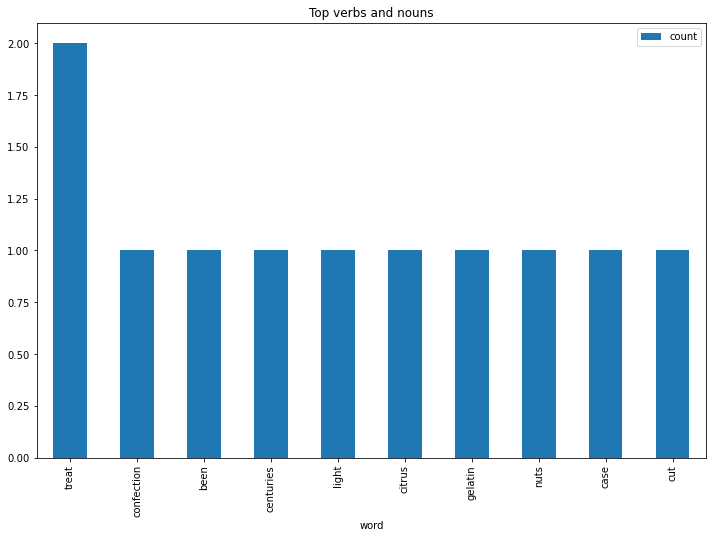

In [26]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [27]:
#Emotion Mining

In [28]:
afinn = pd.read_csv('D:\\ExcelR Assignments\\Text Mining\\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [29]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shefs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(revw))
sentences[5:15]

['This is a confection that has been around a few centuries.',
 'It is a light, pillowy citrus gelatin with nuts - in this case Filberts.',
 'And it is cut into tiny squares and then liberally coated with powdered sugar.',
 'And it is a tiny mouthful of heaven.',
 'Not too chewy, and very flavorful.',
 'I highly recommend this yummy treat.',
 'If you are familiar with the story of C.S.',
 'Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking for the secret ingredient in Robitussin I believe I have found it.',
 'I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.']

In [32]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,I have bought several of the Vitality canned d...
1,The product looks more like a stew than a proc...
2,My Labrador is finicky and she appreciates thi...
3,Product arrived labeled as Jumbo Salted Peanut...
4,Not sure if this was an error or if the vendor...
...,...
2155,Every flavor is dynamite.
2156,"If you are feeling iffy about honey dijon, I w..."
2157,And they're healthy!
2158,(besides a lil fat) I have eaten a lot of chi...


In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [34]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [35]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [36]:
calculate_sentiment(text = '')

0

In [37]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [38]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    21
1    15
2    12
3    13
4    18
5    11
6    14
7    14
8     8
9     6
Name: word_count, dtype: int64

In [39]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
103,:) This offer is a great price and a great tas...,11,42
43,When we realized that we simply couldn't find ...,11,68
768,"Cherries, strawberries or sliced mangos are ni...",11,75
1615,One of Green Mountains best blends of coffee i...,12,20
796,These little tins of sugar free mine mints wer...,12,62
793,I eat 2 of these after lunch (because they are...,13,65
1056,I love love love this deal - it's way fun to p...,13,15
1034,The current deal for the pack of 6 is superb (...,13,30
642,such a yummy flavor I got it as a healthy alte...,14,47
1504,"I love, love, love the idea of this product an...",18,19


In [40]:
sent_df['sentiment_value'].describe()

count    2160.000000
mean        1.476389
std         2.444265
min        -9.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        18.000000
Name: sentiment_value, dtype: float64

In [41]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
3,Product arrived labeled as Jumbo Salted Peanut...,0,13
4,Not sure if this was an error or if the vendor...,-2,18
5,This is a confection that has been around a fe...,0,11
6,"It is a light, pillowy citrus gelatin with nut...",0,14
7,And it is cut into tiny squares and then liber...,-1,14


In [42]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

"In my 1300watt microwave the oatmeal cooks up in about one minute and twenty-seven seconds, so you should also watch that to get a handle on how much time and water to use.<br />  The only bad thing -- if you can consider it a bad thing -- about this offering is that you have to buy in lot so you'll end up with six ten-count boxes."

In [43]:
sent_df['index']=range(0,len(sent_df))

C:\Users\shefs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

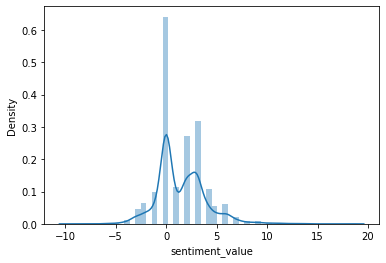

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

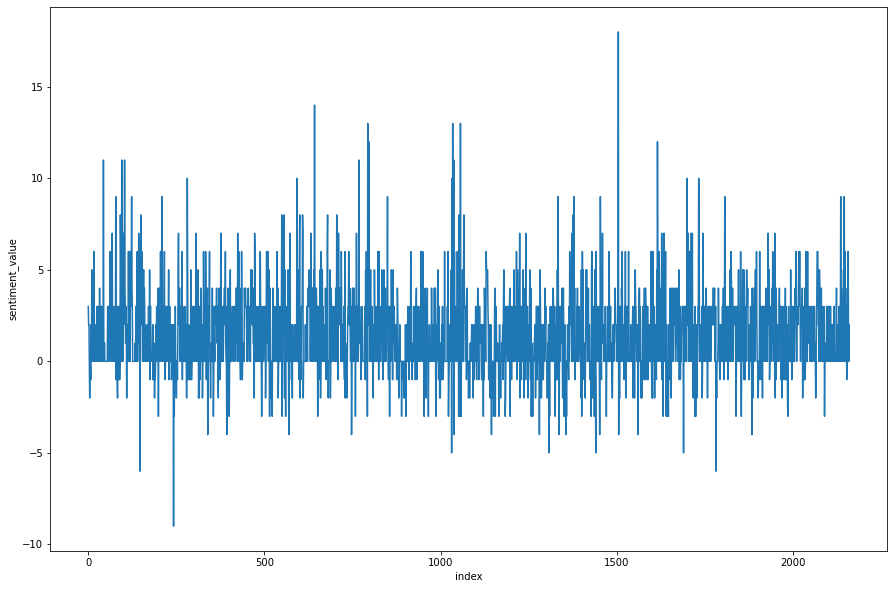

In [48]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

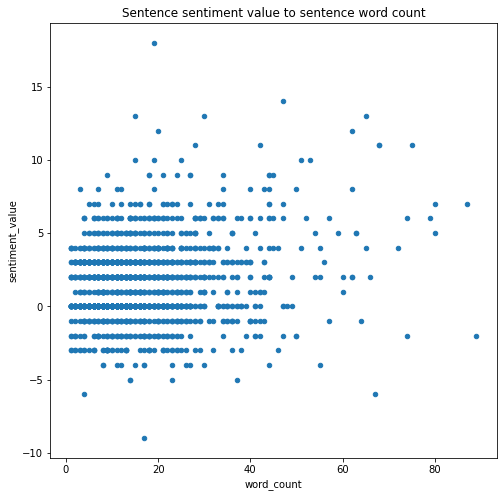

In [46]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')